# **Bigram Character Level Single Layer Neural Network Language Model**

In [47]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# load dataset
words = open('names.txt', 'r').read().splitlines()

In [49]:
# create training set
startToken = '<S>'
endToken = '<E>'

# create lookup table for converting characters to indices
chars = sorted(list(set(''.join(words)))) # all unique characters in the dataset
stoi = {s:i for i,s in enumerate(chars)} # string to index

# manually enumerate start and end token since they are not visible in the dataset
stoi[startToken] = len(stoi)
stoi[endToken] = len(stoi)

# index to string
itos = {i:s for s,i in stoi.items()}

### Prepare the training set of bigrams

In [50]:
xi, yi = [], [] # input and desired output/label/target

for w in words[:1]: # for now lets test it on single word - it will be easier to spot what is going on
    chs = [startToken] + list(w) + [endToken] # add start and end tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xi.append(ix1) # when input is ch1...
        yi.append(ix2) # ...output should be ch2
        
# convert to tensors (tourch.tensor.dtype - int64, torch.Tensor.dtype - float32)
xi = torch.tensor(xi)
yi = torch.tensor(yi)

<S> e
e m
m m
m a
a <E>


### Encode integers with one-hot encoding
Converting categorical data into binary vector where only one element is set to 1. This is useful for feeding categorical data to neural network.

Example if we would like to encode fruits:
- "apple" -> [1, 0, 0]
- "banana" -> [0, 1, 0]
- "orange" -> [0, 0, 1]

And in our case this would be encoded character int value:
- 'a', stoi['a'] -> 0 -> [1, 0, 0, 0, 0, 0, 0, 0, ... , 0] (size of vocabulary)
- 'b', stoi['b'] -> 1 -> [0, 1, 0, 0, 0, 0, 0, 0, ... , 0] (size of vocabulary)

In [51]:
import torch.nn.functional as F
charsLen = len(stoi)

xencoded = F.one_hot(xi, num_classes=charsLen).float()
yencoded = F.one_hot(yi, num_classes=charsLen).float()

# number of bigrams x size of encoded input/output
print(xencoded.shape) 
print(yencoded.shape)

torch.Size([5, 28])
torch.Size([5, 28])


### Create single linear layer neural network
Number of rows (input weights for one neuron) is equal to size of xencoded

Number of columns (number of neurons, and outputs) is equal to size of yencoded

In [52]:
W = torch.randn((charsLen, charsLen))
W.shape

torch.Size([28, 28])

### Remember rules of matrix multiplication:
![matrix_multiplication](images/matrix_multiplication.PNG)

In [53]:
logits = xencoded @ W # in pararell perform matrix multiplication
logits # log-counts, for every neuron we created what is firing rate for each of the input

tensor([[-7.6271e-01, -1.0445e-02, -1.5583e-01, -1.9500e+00, -1.6943e+00,
          2.8120e+00,  4.3569e-01, -2.5571e+00, -1.2642e+00, -3.5517e-01,
         -4.3273e-01,  1.0934e+00,  1.1422e-01,  3.0823e-01,  8.6148e-01,
         -1.2044e+00,  8.0391e-01, -2.2592e-01,  1.1639e-01, -4.7818e-01,
         -1.0584e+00, -9.2038e-02,  6.9485e-01,  9.1054e-01,  1.0406e+00,
         -9.6230e-01, -5.8145e-01,  1.1586e+00],
        [-1.6538e+00,  1.2985e+00,  5.8596e-01,  3.7359e-01,  6.2001e-01,
         -1.5428e-01,  5.1903e-02, -7.3793e-01,  4.7975e-01,  1.4058e+00,
          8.7627e-01, -3.0079e-01,  5.9817e-01,  1.7975e-01, -1.0542e+00,
         -6.2985e-01, -6.6983e-01,  7.8546e-02,  9.6573e-01,  7.8705e-01,
          8.6666e-01,  1.6626e+00,  4.6011e-01, -1.3251e+00, -1.6571e-01,
         -1.0720e+00, -5.8113e-01, -3.5771e-01],
        [ 1.6672e+00,  8.3647e-01, -4.5756e-01,  7.7706e-01,  1.5186e+00,
         -2.0150e+00,  2.6387e-01,  2.0414e+00,  2.1373e+00,  6.2534e-01,
          2.38

### Given firing rate of each neuron for given input we can calculate probability distribution for next character in the sequence

In [54]:
# lets get rid of negative numbers by exponentiating, and it will be somewhat equivalent to counts of occurence
counts = torch.exp(logits)

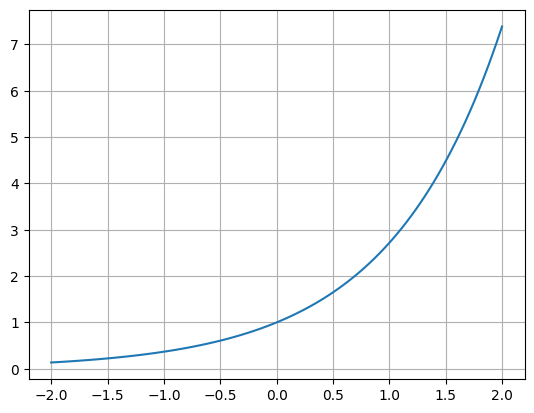

In [55]:
# exponention yi = e^xi, for number x lower than 0 we will get number between 0 and 1
x = np.linspace(-2, 2, 100)
y = np.exp(x)
plt.plot(x, y)
plt.grid(True)
plt.show()

### Now we can calculate probability distribution, since it is just normalized counts

In [56]:
probabilities = counts / counts.sum(axis=1, keepdims=True)
probabilities

tensor([[0.0097, 0.0206, 0.0178, 0.0030, 0.0038, 0.3457, 0.0321, 0.0016, 0.0059,
         0.0146, 0.0135, 0.0620, 0.0233, 0.0283, 0.0492, 0.0062, 0.0464, 0.0166,
         0.0233, 0.0129, 0.0072, 0.0189, 0.0416, 0.0516, 0.0588, 0.0079, 0.0116,
         0.0662],
        [0.0045, 0.0863, 0.0423, 0.0342, 0.0438, 0.0202, 0.0248, 0.0113, 0.0381,
         0.0961, 0.0566, 0.0174, 0.0428, 0.0282, 0.0082, 0.0125, 0.0121, 0.0255,
         0.0619, 0.0517, 0.0560, 0.1242, 0.0373, 0.0063, 0.0200, 0.0081, 0.0132,
         0.0165],
        [0.0834, 0.0363, 0.0100, 0.0342, 0.0719, 0.0021, 0.0205, 0.1212, 0.1334,
         0.0294, 0.0200, 0.0173, 0.0948, 0.0040, 0.0607, 0.0147, 0.0158, 0.0025,
         0.0053, 0.0536, 0.0058, 0.0293, 0.0042, 0.0106, 0.0193, 0.0062, 0.0271,
         0.0662],
        [0.0834, 0.0363, 0.0100, 0.0342, 0.0719, 0.0021, 0.0205, 0.1212, 0.1334,
         0.0294, 0.0200, 0.0173, 0.0948, 0.0040, 0.0607, 0.0147, 0.0158, 0.0025,
         0.0053, 0.0536, 0.0058, 0.0293, 0.0042, 0.0106

### Above output calculations with exponential function and normalization is called softmax function witch we can put after linear layer to get probability distribution

![softmax](images/softmax.PNG)

### Loss function
I will use average negative log likelihood like in bigram.ipynb

The reason behind it is mostly convenience since probabilities are very small numbers and multiplying them together will result in very small number. To avoid this we can use log function and convert multiplication to addition. Also we can use negative log to find minimum instead of maximum. And finally we can use average to make it independent of number of samples.

In [57]:
# number of rows which corresponds to number of bigrams in our word
bigramSize = probabilities.size(0) # same as yencoded.shape[0]


In [68]:
# negative log likelihoods
nlls = torch.zeros(bigramSize)

for i in range(bigramSize):
    x = xi[i].item() # input character index
    y = yi[i].item() # desired output character index / label
    print(f'Bigram example: {itos[x]}{itos[y]}')
    print(f'Input to neural net (before encoding): {itos[x]}')
    print(f'Desired output / label (before encoding): {itos[y]}')
    probabilityOfDesiredOutput = probabilities[i, y]
    print(f'Probability of desired output: {probabilityOfDesiredOutput}')
    nll = -torch.log(probabilityOfDesiredOutput)
    print(f'Negative log likelihood (lower-better): {nll}')
    print("--------------------------------------------------------")
    nlls[i] = nll
    
avgnll = nlls.mean()
print(f'Average negative log likelihood (overall quality of neural network, lower-better): {avgnll}')

Bigram example: <S>e
Input to neural net (before encoding): <S>
Desired output / label (before encoding): e
Probability of desired output: 0.003815497038885951
Negative log likelihood (lower-better): 5.568684101104736
--------------------------------------------------------
Bigram example: em
Input to neural net (before encoding): e
Desired output / label (before encoding): m
Probability of desired output: 0.04284282401204109
Negative log likelihood (lower-better): 3.150217056274414
--------------------------------------------------------
Bigram example: mm
Input to neural net (before encoding): m
Desired output / label (before encoding): m
Probability of desired output: 0.09478394687175751
Negative log likelihood (lower-better): 2.3561551570892334
--------------------------------------------------------
Bigram example: ma
Input to neural net (before encoding): m
Desired output / label (before encoding): a
Probability of desired output: 0.08339779824018478
Negative log likelihood (lowe